Text(0, 0.5, 'Num. of data rows')

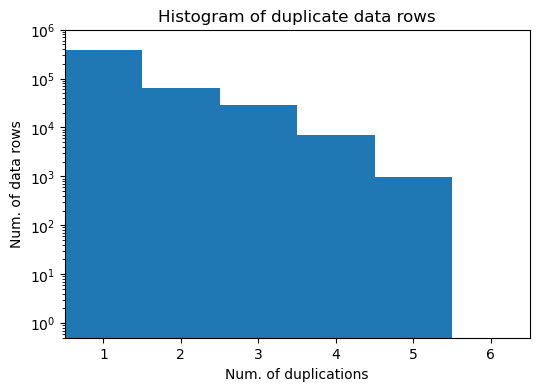

In [1]:
#!/usr/bin/env python

import os
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

import astropy.io.fits as pyfits
from astropy.time import Time

#import geopandas

#import sys
#sys.path.append('../pylib')
import kytime

#if __name__=="__main__" :

# plt.rcParams["font.size"]= 11

#fname = 'shk_kgd_lc1s.fits'
#fname = 'shk_kgd_lc1s_250120.fits'
fname = 'shk_kgd_lc1s_dev.fits'

hdul = pyfits.open(fname)
hdu = hdul[1]
vtime = hdu.data.field("Time")
vobcbtc = hdu.data.field("OBCBTC")
vcpustat = hdu.data.field("CPUSTATUS")
#vlon = hdu.data.field("Longitude")
#vlat = hdu.data.field("Latitude")
#vlon = hdu.data.field("GPS_LON")
#vlat = hdu.data.field("GPS_LAT")
vdupflag = hdu.data.field("DUPFLAG")
vobctimsel = hdu.data.field("OBCTIMSEL")
vlc1 = hdu.data.field("LC1")


###
### dupflag histogram
###
fig1, axs1 = plt.subplots(1,1, figsize=(6, 4))
#fig2.subplots_adjust(left=0.2, right=0.9, bottom=0.1, top=0.9)
#xedges = np.linspace(-0.5, 10.5, 12) 
xedges = np.linspace(-0.5, 5.5, 7) 
hist_dupflag, xedges = np.histogram(vdupflag, xedges)
#hist2 = axs2.hist(vdupflag, xedges)
#hist2 = axs2.hist(vdupflag+1, xedges+1)
#vx = (xedges[:-1]+xedges[1:])/2.
xedges+=1
axs1.stairs(hist_dupflag, xedges, fill=True)
axs1.set_xlim(xedges[0], xedges[-1]) 
ymima = axs1.get_ylim()
newyma = np.power(10,int(np.log10(ymima[1]))+1)
axs1.set_ylim(0.5, newyma)
axs1.set_yscale('log')

axs1.set_title("Histogram of duplicate data rows")
axs1.set_xlabel("Num. of duplications")
axs1.set_ylabel("Num. of data rows")


Text(0, 0.5, 'Num. of data rows')

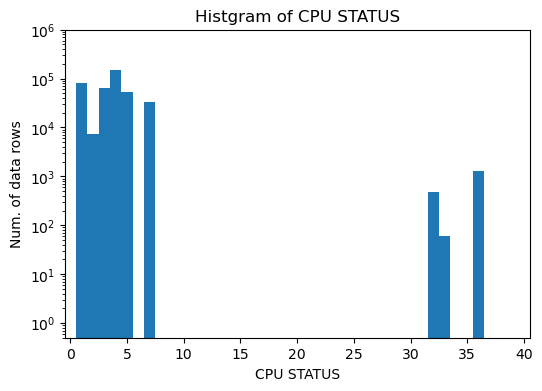

In [2]:
#### filter dupflag==0
vcutdup = vdupflag==0 ### cut array

vtime = vtime[vcutdup]
vobcbtc = vobcbtc[vcutdup]
vcpustat = vcpustat[vcutdup]
vlc1  = vlc1[vcutdup]
vobctimsel = vobctimsel[vcutdup]


###
### dupflag histogram
###
fig2, axs2 = plt.subplots(1,1, figsize=(6, 4))
xedges = np.linspace(-0.5, 40.5, 42) 
hist_cpustat, xedges = np.histogram(vcpustat, xedges)
axs2.stairs(hist_cpustat, xedges, fill=True)
axs2.set_xlim(xedges[0], xedges[-1]) 
ymima = axs2.get_ylim()
newyma = np.power(10,int(np.log10(ymima[1]))+1)
axs2.set_ylim(0.5, newyma)
axs2.set_yscale('log')

axs2.set_title("Histgram of CPU STATUS")
axs2.set_xlabel("CPU STATUS")
axs2.set_ylabel("Num. of data rows")


Total KGD_OK and GPS_OK data is 304495 (2532116 s)
Total KGD_OK and GPS_NG data is 85107 (695291 s)


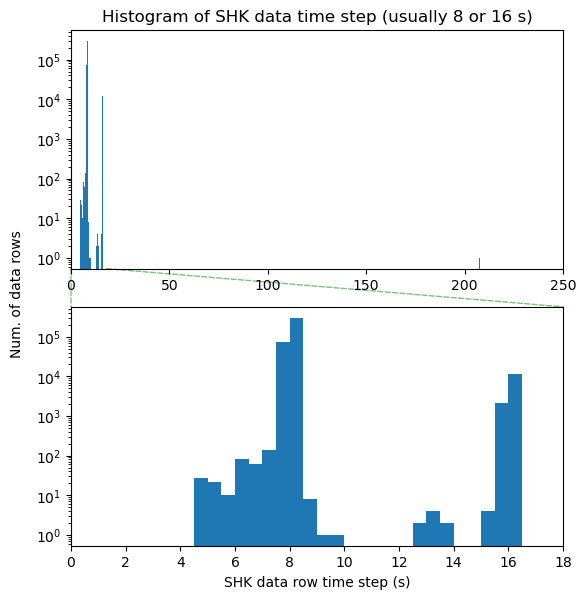

In [3]:
### filter bad (multiple) obcbtc
vsel_badobcbtc = np.any([vobcbtc==658, vobcbtc==708, vobcbtc==811], axis=0)
vsel_goodobcbtc = np.logical_not(vsel_badobcbtc) ### cut array

vtime = vtime[vsel_goodobcbtc]
vobcbtc = vobcbtc[vsel_goodobcbtc]
vlc1  = vlc1[vsel_goodobcbtc]
vobctimsel = vobctimsel[vsel_goodobcbtc]
#vcut = np.logical_and(tstart<vtime, vtime<tstop)
vcut_gpsok = vobctimsel==1 ### GPS OK
vcut_gpsng = vobctimsel>=2

vcut1 = vcut_gpsok
vcut2 = vcut_gpsng
nvcut1 = (vcut1*1).sum()
nvcut2 = (vcut2*1).sum()

vtdiff = vtime[1:]-vtime[:-1]
vtdiff1 = np.append(vtdiff[0], vtdiff)
vtdiff2 = np.append(vtdiff, vtdiff[-1])
vtdel = np.min([vtdiff1, vtdiff2], axis=0)

###
### time-delta histogram
###

fig3, axs3 = plt.subplots(2,1, figsize=(6, 6))
fig3.subplots_adjust(left=0.12, right=0.94, bottom=0.08, top=0.94, hspace=0.16)

xedges = np.linspace(0.0, 250, 501) 
hist_tdel, xedges = np.histogram(vtdel, xedges)
axs3[0].stairs(hist_tdel, xedges, fill=True)
axs3[0].set_xlim(xedges[0], xedges[-1]) 
axs3[0].set_yscale('log')
ymi, yma = axs3[0].get_ylim()

xmi1 = 0.0
xma1 = 18.0
axs3[1].stairs(hist_tdel, xedges, fill=True)
axs3[1].set_xlim(xmi1, xma1) 
axs3[1].set_yscale('log')

xya =(xmi1, ymi)
xyb =(xmi1, yma)
con1 = ConnectionPatch(xyA=xya, xyB=xyb, coordsA="data", coordsB="data", axesA=axs3[0], axesB=axs3[1],
                       color="g", ls='dashed', lw=1, alpha=0.5)
xya =(xma1, ymi)
xyb =(xma1, yma)
con2 = ConnectionPatch(xyA=xya, xyB=xyb, coordsA="data", coordsB="data", axesA=axs3[0], axesB=axs3[1],
                       color="g", ls='dashed', lw=1, alpha=0.5)
axs3[0].add_artist(con1)
axs3[0].add_artist(con2)

axs3[0].set_title("Histogram of SHK data time step (usually 8 or 16 s)")
axs3[1].set_xlabel("SHK data row time step (s)")
fig3.text(0.03, 0.5, "Num. of data rows",
          ha='center', va='center', rotation=90)

### calculate exposure
exptime1 = vtdel[vcut1]
exptime2 = vtdel[vcut2]
print("Total KGD_OK and GPS_OK data is %d (%d s)"%(nvcut1, exptime1.sum()))
print("Total KGD_OK and GPS_NG data is %d (%d s)"%(nvcut2, exptime2.sum()))


Text(0.03, 0.5, 'KGD counts (s$^{-1}$)')

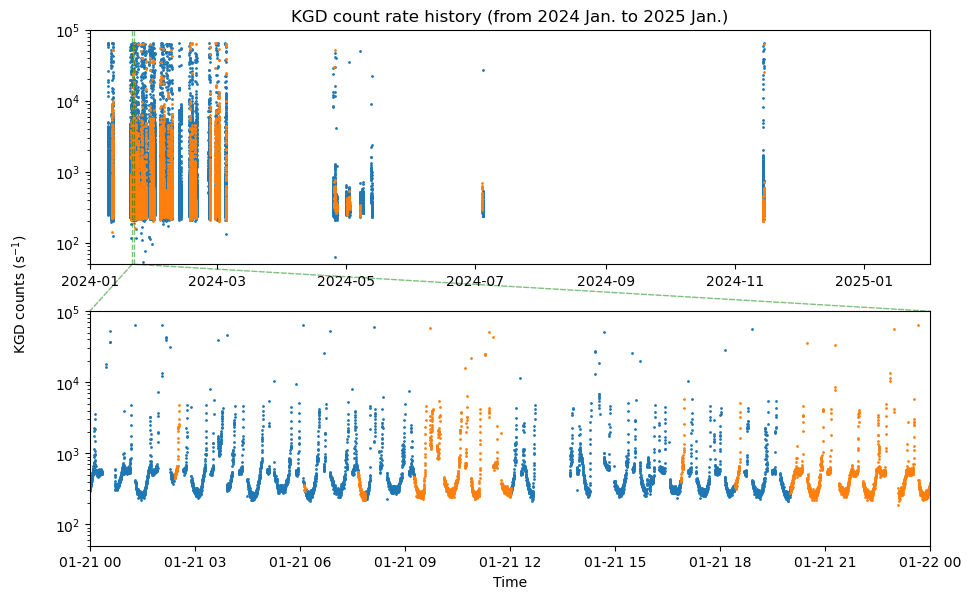

In [4]:
### Plot LC1 rate history
### convert time units
vastime = kytime.mstime2astime(vtime)
vdatetime = vastime.to_datetime()

### spec panel
fig4, axs4 = plt.subplots(2,1, figsize=(10, 6))
fig4.subplots_adjust(left=0.1, right=0.94, bottom=0.08, top=0.94, hspace=0.2)


axs4[0].plot(vdatetime[vcut1], vlc1[vcut1], '.', ms=2)
axs4[0].plot(vdatetime[vcut2], vlc1[vcut2], '.', ms=2)
axs4[0].set_yscale('log')

#axs[0].set_xlim(datetime(2024,1,1), datetime(2024,6,1))
axs4[0].set_xlim(datetime(2024,1,1), datetime(2025,2,1))

axs4[1].plot(vdatetime[vcut1], vlc1[vcut1], '.', ms=2)
axs4[1].plot(vdatetime[vcut2], vlc1[vcut2], '.', ms=2)
axs4[1].set_yscale('log')
axs4[1].set_xlim(datetime(2024,1,20), datetime(2024,1,22))

ymi = 0.5e2
yma = 1.0e5
axs4[0].set_ylim(ymi, yma)
axs4[1].set_ylim(ymi, yma)
xmi1 = datetime(2024,1,21)
xma1 = datetime(2024,1,22)
axs4[1].set_xlim(xmi1, xma1)

axs4[0].vlines(xmi1, ymi, yma, color='g', ls='dashed', lw=1, alpha=0.5)
axs4[0].vlines(xma1, ymi, yma, color='g', ls='dashed', lw=1, alpha=0.5)

xya =(xmi1, ymi)
xyb =(xmi1, yma)
con1 = ConnectionPatch(xyA=xya, xyB=xyb, coordsA="data", coordsB="data", axesA=axs4[0], axesB=axs4[1],
                       color="g", ls='dashed', lw=1, alpha=0.5)
xya =(xma1, ymi)
xyb =(xma1, yma)
con2 = ConnectionPatch(xyA=xya, xyB=xyb, coordsA="data", coordsB="data", axesA=axs4[0], axesB=axs4[1],
                       color="g", ls='dashed', lw=1, alpha=0.5)

axs4[0].add_artist(con1)
axs4[0].add_artist(con2)

axs4[0].set_title("KGD count rate history (from 2024 Jan. to 2025 Jan.)")
axs4[1].set_xlabel("Time")
fig4.text(0.03, 0.5, "KGD counts (s$^{-1}$)",
          ha='center', va='center', rotation=90)
    